In [147]:
#Import necessary Libraries


import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as SM
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix #Model Evaluation technique
from sklearn.model_selection import train_test_split                           #Train-test split

%matplotlib inline  
color = sns.color_palette()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
# Remove warnings

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [148]:
#Read the dataset
df = pd.read_excel('Company_Data2015-1.xlsx')

#Checking the head of the dataset
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   Current Liabilities and Provisions   \
0            40.50                              1116.85   
1           486.86                              1585.74   
2          9097.64                              4601.39   
3          1034.12                              3646.54   
4          4685.81                              2849.58   

   Total Assets/Liabilities   Gross Sales  Net Sales  Other Income  \
0                     109.60         0.00       0.00          7.60   
1                    6043.94      2892.73    2892.73         46.27   
2                   12316.07       392.13     392.13          9.55   
3                    6000.42      1354.39    1354.39        223.85   
4                    7524.91        38.72      38.72          9.82   

   Value Of Output  Cost of Production  Selling Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted PAT      CP  Revenue earnings in forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue expenses in forex  Capital expenses in forex  \
0                       0.00                       0.00   
1                     143.42                     141.17   
2                      86.36                       2.27   
3                      28.88                       0.00   
4                      15.62                       0.00   

   Book Value (Unit Curr)  Book Value (Adj.) (Unit Curr)  \
0                 -167.58                        -167.58   
1                  -15.18                         -15.18   
2                   94.14                          94.14   
3                  -39.64                         -39.64   
4                 -212.89                        -212.89   

   Market Capitalisation  CEPS (annualised) (Unit Curr)  \
0                   0.00                         -22.09   
1                1544.39                          -0.02   
2                1220.81                        -148.31   
3                 194.27                         -43.08   
4                 113.68                        -159.50   

   Cash Flow From Operating Activities  Cash Flow From Investing Activities  \
0                              -102.47                                 1.46   
1                               635.91                              -785.00   
2                              -873.40                              -458.27   
3                               324.

### Fixing Column names containing spaces & other special characters for ease of use

In [149]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

In [150]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

## Shape of the data:

In [151]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

## Statistical discription of dataset:

In [153]:
df.describe().T

count          mean            std  \
Co_Code                              3586.0  16065.388734   19776.817379   
Networth_Next_Year                   3586.0    725.045251    4769.681004   
Equity_Paid_Up                       3586.0     62.966584     778.761744   
Networth                             3586.0    649.746299    4091.988792   
Capital_Employed                     3586.0   2799.611054   26975.135385   
Total_Debt                           3586.0   1994.823779   23652.842746   
Gross_Block                          3586.0    594.178829    4871.547802   
Net_Working_Capital                  3586.0    410.809665    6301.218546   
Current_Assets                       3586.0   1960.349172   22577.570829   
Current_Liabilities_and_Provisions   3586.0    391.992078    2675.001631   
Total_Assets_by_Liabilities          3586.0   1778.453751   11437.574690   
Gross_Sales                          3586.0   1123.738985   10603.703837   
Net_Sales                            3586.0   1079.702579    9996.574173   
Other_Income                         3586.0     48.729824     426.040665   
Value_Of_Output                      3586.0   1077.187292    9843.880293   
Cost_of_Production                   3586.0    798.544621    9076.702982   
Selling_Cost                         3586.0     25.554997     194.244466   
PBIDT                                3586.0    248.175282    1949.593350   
PBDT                                 3586.0    116.268795     956.199566   
PBIT                                 3586.0    217.659395    1850.972782   
PBT                                  3586.0     85.752909     799.925768   
PAT                                  3586.0     61.218313     620.298432   
Adjusted_PAT                         3586.0     60.058963     580.432912   
CP                                   3586.0     91.734200     780.790561   
Revenue_earnings_in_forex            3586.0    131.165270    1150.730209   
Revenue_expenses_in_forex            3586.0    256.327002    4132.339619   
Capital_expenses_in_forex            3586.0      7.655689     111.432070   
Book_Value_Unit_Curr                 3586.0    157.237836    1622.664105   
Book_Value_Adj._Unit_Curr            3582.0   2243.152917  128283.728186   
Market_Capitalisation                3586.0   1664.092387   12805.173084   
CEPS_annualised_Unit_Curr            3586.0     36.018709     828.420796   
Cash_Flow_From_Operating_Activities  3586.0     65.770750    1455.048376   
Cash_Flow_From_Investing_Activities  3586.0    -60.870365     701.974713   
Cash_Flow_From_Financing_Activities  3586.0     11.436453    1272.257361   
ROG_Net_Worth_perc                   3586.0   1237.624576   41041.930017   
ROG_Capital_Employed_perc            3586.0   2988.884612  126472.870285   
ROG_Gross_Block_perc                 3586.0     37.554306     893.619402   
ROG_Gross_Sales_perc                 3586.0    242.672962    6103.527897   
ROG_Net_Sales_perc                   3586.0    242.588530    6103.487655   
ROG_Cost_of_Production_perc          3586.0    310.488405    5573.215095   
ROG_Total_Assets_perc                3586.0   2793.282621  125941.653747   
ROG_PBIDT_perc                       3586.0    375.852181   23278.396117   
ROG_PBDT_perc                        3586.0    336.379947   20353.396660   
ROG_PBIT_perc                        3586.0    374.699958   22462.789381   
ROG_PBT_perc                         3586.0    224.070248   19659.232661   
ROG_PAT_perc                         3586.0    112.231654   13480.515287   
ROG_CP_perc                          3586.0    221.091523   13980.202791   
ROG_Revenue_earnings_in_forex_perc   3586.0     37.227844     658.666041   
ROG_Revenue_expenses_in_forex_perc   3586.0    364.863221   15233.643027   
ROG_Market_Capitalisation_perc       3586.0     63.682220    1047.928144   
Current_Ratio_Latest                 3585.0     12.056603     108.410131   
Fixed_Assets_Ratio_Latest            3585.0     51.538840     681.150910   
Inventory_

### Checking for Duplicate values in dataset:

In [154]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Co_Code, Co_Name, Networth_Next_Year, Equity_Paid_Up, Networth, Capital_Employed, Total_Debt, Gross_Block, Net_Working_Capital, Current_Assets, Current_Liabilities_and_Provisions, Total_Assets_by_Liabilities, Gross_Sales, Net_Sales, Other_Income, Value_Of_Output, Cost_of_Production, Selling_Cost, PBIDT, PBDT, PBIT, PBT, PAT, Adjusted_PAT, CP, Revenue_earnings_in_forex, Revenue_expenses_in_forex, Capital_expenses_in_forex, Book_Value_Unit_Curr, Book_Value_Adj._Unit_Curr, Market_Capitalisation, CEPS_annualised_Unit_Curr, Cash_Flow_From_Operating_Activities, Cash_Flow_From_Investing_Activities, Cash_Flow_From_Financing_Activities, ROG_Net_Worth_perc, ROG_Capital_Employed_perc, ROG_Gross_Block_perc, ROG_Gross_Sales_perc, ROG_Net_Sales_perc, ROG_Cost_of_Production_perc, ROG_Total_Assets_perc, ROG_PBIDT_perc, ROG_PBDT_perc, ROG_PBIT_perc, ROG_PBT_perc, ROG_PAT_perc, ROG_CP_perc, ROG_Revenue_earnings_in_forex_perc, ROG_Revenue_expenses_in_forex_perc, ROG_Market_Capitalisation_perc, Current_Ratio_Latest, Fixed_Assets_Ratio_Latest, Inventory_Ratio_Latest, Debtors_Ratio_Latest, Total_Asset_Turnover_Ratio_Latest, Interest_Cover_Ratio_Latest, PBIDTM_perc_Latest, PBITM_perc_Latest, PBDTM_perc_Latest, CPM_perc_Latest, APATM_perc_Latest, Debtors_Velocity_Days, Creditors_Velocity_Days, Inventory_Velocity_Days, Value_of_Output_by_Total_Assets, Value_of_Output_by_Gross_Block]
Index: []

### Introducing a new column "Default" where its values are either 0 or 1 depending on column "Networth_Next_Year" is positive or negative... "Default" will be the final Dependent (target) variable.

In [155]:
df["Default"] = df["Networth_Next_Year"]
df["Default"]=df["Default"].astype('int64')

In [156]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [157]:
for i in range(len(df)):
    if df.loc[i,"Networth_Next_Year"] <= 0:
        df.loc[i,"Default"] = 1
    else:
        df.loc[i,"Default"] = 0

In [158]:
df[["Networth_Next_Year","Default"]]

Networth_Next_Year  Default
0               -8021.60        1
1               -3986.19        1
2               -3192.58        1
3               -3054.51        1
4               -2967.36        1
...                  ...      ...
3581            72677.77        0
3582            79162.19        0
3583            88134.31        0
3584            91293.70        0
3585           111729.10        0

[3586 rows x 2 columns]

In [159]:
df.head(5)

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [161]:
df["Default"].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [162]:
df["Default"].value_counts(normalize=True)

0    0.891801
1    0.108199
Name: Default, dtype: float64

### It is seen that almost 10% of the total entries in "Default" belong to category "1".

### Checking for NULL value

In [163]:
df.isnull().sum()

Co_Code                                  0
Co_Name                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block                              0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_by_Liabilities              0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PA

There are Null values in the dataset

## Univariate analysis

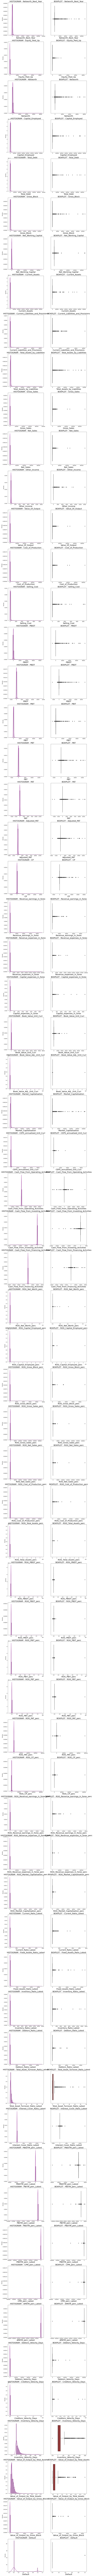

In [164]:
col_names = list(df.columns)
col_names.remove('Co_Code')
col_names.remove('Co_Name')

fig, axs=plt.subplots(nrows= 66, ncols= 2, squeeze=True, figsize=(15,500))

for i, col_val in enumerate(col_names):
    
    # HISTOGRAM
    sns.distplot(df[col_val], kde=True, bins=50, hist_kws=dict(ec='black'), ax=axs[i][0], color='purple')
    axs[i][0].set_title('HISTOGRAM - {}'.format(col_val), fontsize=20)
    axs[i][0].set_xlabel(col_val, fontsize=20)
    
    # BOXPLOT
    sns.boxplot(df[col_val], ax=axs[i][1], color='brown')
    axs[i][1].set_title('BOXPLOT - {}'.format(col_val), fontsize=20)
    axs[i][1].set_xlabel(col_val, fontsize=20)
    
plt.show()

#### It is observed that all the variables have Ouliers. Also, from Histogram it is seen that all the variables are highly skewed, right or left.

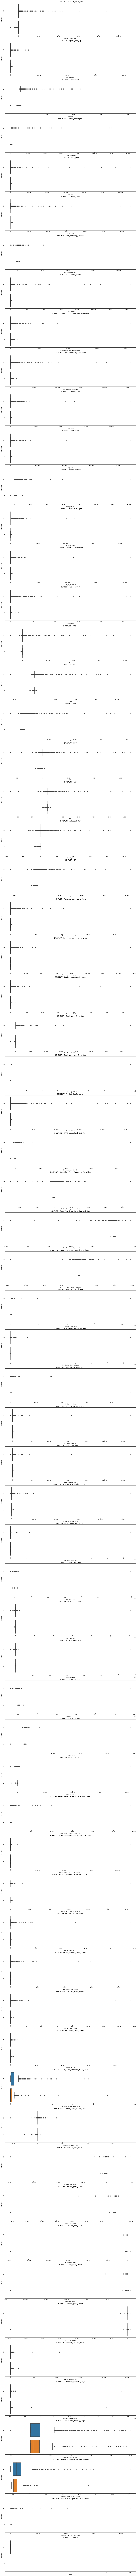

In [165]:
col_names = list(df.columns)
col_names.remove('Co_Code')
col_names.remove('Co_Name')
fig, ax = plt.subplots(nrows= 66, figsize=(20,400))
i = 0
for i, col_val in enumerate(col_names):
    
    # BOXPLOT
    
    sns.boxplot(x = df[col_val], y = df["Default"] , ax=ax[i], orient='h')

    ax[i].set_title('BOXPLOT - {}'.format(col_val), fontsize=14)
    ax[i].set_ylabel("Default", fontsize=14)


plt.show()

In [166]:
df.skew()

Co_Code                                 1.604115
Networth_Next_Year                     13.041264
Equity_Paid_Up                         45.928921
Networth                               11.738799
Capital_Employed                       18.073683
Total_Debt                             19.417622
Gross_Block                            18.528589
Net_Working_Capital                    30.580553
Current_Assets                         20.779473
Current_Liabilities_and_Provisions     15.291405
Total_Assets_by_Liabilities            13.367863
Gross_Sales                            31.560200
Net_Sales                              31.085039
Other_Income                           18.805640
Value_Of_Output                        30.812223
Cost_of_Production                     34.588562
Selling_Cost                           18.879055
PBIDT                                  13.179047
PBDT                                   13.555030
PBIT                                   14.009481
PBT                 

In [167]:
df.mean()

Co_Code                                16065.388734
Networth_Next_Year                       725.045251
Equity_Paid_Up                            62.966584
Networth                                 649.746299
Capital_Employed                        2799.611054
Total_Debt                              1994.823779
Gross_Block                              594.178829
Net_Working_Capital                      410.809665
Current_Assets                          1960.349172
Current_Liabilities_and_Provisions       391.992078
Total_Assets_by_Liabilities             1778.453751
Gross_Sales                             1123.738985
Net_Sales                               1079.702579
Other_Income                              48.729824
Value_Of_Output                         1077.187292
Cost_of_Production                       798.544621
Selling_Cost                              25.554997
PBIDT                                    248.175282
PBDT                                     116.268795
PBIT        

## Bivariate analysis

In [168]:
df.corr()

Co_Code  Networth_Next_Year  \
Co_Code                              1.000000           -0.052519   
Networth_Next_Year                  -0.052519            1.000000   
Equity_Paid_Up                      -0.005923            0.364376   
Networth                            -0.056693            0.971500   
Capital_Employed                    -0.042042            0.594155   
Total_Debt                          -0.036870            0.480513   
Gross_Block                         -0.043245            0.742405   
Net_Working_Capital                 -0.019953            0.240580   
Current_Assets                      -0.038191            0.481718   
Current_Liabilities_and_Provisions  -0.056355            0.777579   
Total_Assets_by_Liabilities         -0.050236            0.821037   
Gross_Sales                         -0.041289            0.593493   
Net_Sales                           -0.041391            0.600618   
Other_Income                        -0.047035            0.678346   
Value_Of_Output                     -0.041720            0.605301   
Cost_of_Production                  -0.033688            0.497055   
Selling_Cost                        -0.062795            0.364037   
PBIDT                               -0.052736            0.760070   
PBDT                                -0.048206            0.860290   
PBIT                                -0.050186            0.704101   
PBT                                 -0.045221            0.805141   
PAT                                 -0.041432            0.787905   
Adjusted_PAT                        -0.041221            0.777510   
CP                                  -0.045622            0.854636   
Revenue_earnings_in_forex           -0.040652            0.436856   
Revenue_expenses_in_forex           -0.027315            0.395118   
Capital_expenses_in_forex           -0.022548            0.572393   
Book_Value_Unit_Curr                 0.050388            0.026351   
Book_Value_Adj._Unit_Curr           -0.013365            0.004253   
Market_Capitalisation               -0.057611            0.703192   
CEPS_annualised_Unit_Curr            0.038102            0.011149   
Cash_Flow_From_Operating_Activities -0.014786            0.344339   
Cash_Flow_From_Investing_Activities  0.012111           -0.562411   
Cash_Flow_From_Financing_Activities  0.007039           -0.015127   
ROG_Net_Worth_perc                   0.064757            0.003461   
ROG_Capital_Employed_perc            0.053742            0.004571   
ROG_Gross_Block_perc                 0.009248           -0.003156   
ROG_Gross_Sales_perc                 0.042460           -0.005366   
ROG_Net_Sales_perc                   0.042469           -0.005362   
ROG_Cost_of_Production_perc          0.064517           -0.007222   
ROG_Total_Assets_perc                0.051877            0.004759   
ROG_PBIDT_perc                       0.025952           -0.001490   
ROG_PBDT_perc                        0.027450           -0.001497   
ROG_PBIT_perc                        0.027373           -0.001515   
ROG_PBT_perc                         0.028578           -0.000705   
ROG_PAT_perc                         0.025146           -0.000199   
ROG_CP_perc                          0.028765           -0.001373   
ROG_Revenue_earnings_in_forex_perc  -0.012250            0.020682   
ROG_Revenue_expenses_in_forex_perc  -0.001344           -0.001876   
ROG_Market_Capitalisation_perc      -0.024809           -0.003039   
Current_Ratio_Latest                 0.035363           -0.014300   
Fixed_Assets_Ratio_Latest            0.043518           -0.009200   
Inventory_Ratio_Latest               0.004780            0.189692   
Debtors_Ratio_Latest                -0.005284           -0.002456   
Total_Asset_Turnover_Ratio_Latest    0.062597           -0.028608   
Interest_Cover_Ratio_Latest          0.007731            0.033619   
PBIDTM_perc_Latest                   0.002949            0.005635   
PBITM_perc_Latest                   

### Selecting important variables

#### Profitability ratios, Liquidity and Leverage ratios are important variables. The new dataframe cp_2 is a collection of such important variables fetched from the source dataframe

In [169]:
df1=df[['Networth_Next_Year','PBIDT','PBDT','PBIT','PBT','PAT','Adjusted_PAT','ROG_Total_Assets_perc',
         'Current_Ratio_Latest','Fixed_Assets_Ratio_Latest','Inventory_Ratio_Latest','Debtors_Ratio_Latest',
         'Total_Asset_Turnover_Ratio_Latest','Interest_Cover_Ratio_Latest']]

In [170]:
df1.corr()

Networth_Next_Year     PBIDT      PBDT  \
Networth_Next_Year                           1.000000  0.760070  0.860290   
PBIDT                                        0.760070  1.000000  0.767398   
PBDT                                         0.860290  0.767398  1.000000   
PBIT                                         0.704101  0.993365  0.714482   
PBT                                          0.805141  0.778678  0.978305   
PAT                                          0.787905  0.744135  0.967552   
Adjusted_PAT                                 0.777510  0.754622  0.953854   
ROG_Total_Assets_perc                        0.004759 -0.002854 -0.003111   
Current_Ratio_Latest                        -0.014300 -0.012782 -0.011764   
Fixed_Assets_Ratio_Latest                   -0.009200 -0.008797 -0.008014   
Inventory_Ratio_Latest                       0.189692  0.098002  0.196340   
Debtors_Ratio_Latest                        -0.002456 -0.004539 -0.001499   
Total_Asset_Turnover_Ratio_Latest           -0.028608 -0.031744 -0.012063   
Interest_Cover_Ratio_Latest                  0.033619  0.025139  0.057929   

                                       PBIT       PBT       PAT  Adjusted_PAT  \
Networth_Next_Year                 0.704101  0.805141  0.787905      0.777510   
PBIDT                              0.993365  0.778678  0.744135      0.754622   
PBDT                               0.714482  0.978305  0.967552      0.953854   
PBIT                               1.000000  0.746946  0.710947      0.725237   
PBT                                0.746946  1.000000  0.988037      0.979170   
PAT                                0.710947  0.988037  1.000000      0.984331   
Adjusted_PAT                       0.725237  0.979170  0.984331      1.000000   
ROG_Total_Assets_perc             -0.002670 -0.002942 -0.002919     -0.003091   
Current_Ratio_Latest              -0.011778 -0.010163 -0.009272     -0.009717   
Fixed_Assets_Ratio_Latest         -0.008070 -0.006812 -0.006109     -0.006728   
Inventory_Ratio_Latest             0.068251  0.153773  0.165479      0.145394   
Debtors_Ratio_Latest              -0.004354 -0.000806 -0.000083     -0.000218   
Total_Asset_Turnover_Ratio_Latest -0.032553 -0.012379 -0.012298     -0.014059   
Interest_Cover_Ratio_Latest        0.024992  0.065806  0.072445      0.077047   

                                   ROG_Total_Assets_perc  \
Networth_Next_Year                              0.004759   
PBIDT                                          -0.002854   
PBDT                                           -0.003111   
PBIT                                           -0.002670   
PBT                                            -0.002942   
PAT                                            -0.002919   
Adjusted_PAT                                   -0.003091   
ROG_Total_Assets_perc                           1.000000   
Current_Ratio_Latest                           -0.002218   
Fixed_Assets_Ratio_Latest                       0.024998   
Inventory_Ratio_Latest                          0.004424   
Debtors_Ratio_Latest                           -0.001128   
Total_Asset_Turnover_Ratio_Latest              -0.007970   
Interest_Cover_Ratio_Latest                    -0.000993   

                                   Current_Ratio_Latest  \
Networth_Next_Year                            -0.014300   
PBIDT                                         -0.012782   
PBDT                                          -0.011764   
PBIT                                          -0.011778   
PBT                                           -0.010163   
PAT                                           -0.009272   
Adjusted_PAT                                  -0.009717   
ROG_Total_Assets_perc                         -0.002218   
Current_Ratio_Latest                           1.000000   
Fixed_Assets_Ratio_Latest                      0.001783   
Inventory_Ratio_Latest                        -0.006896   
Debtors_Ratio_Latest                          -0.00542

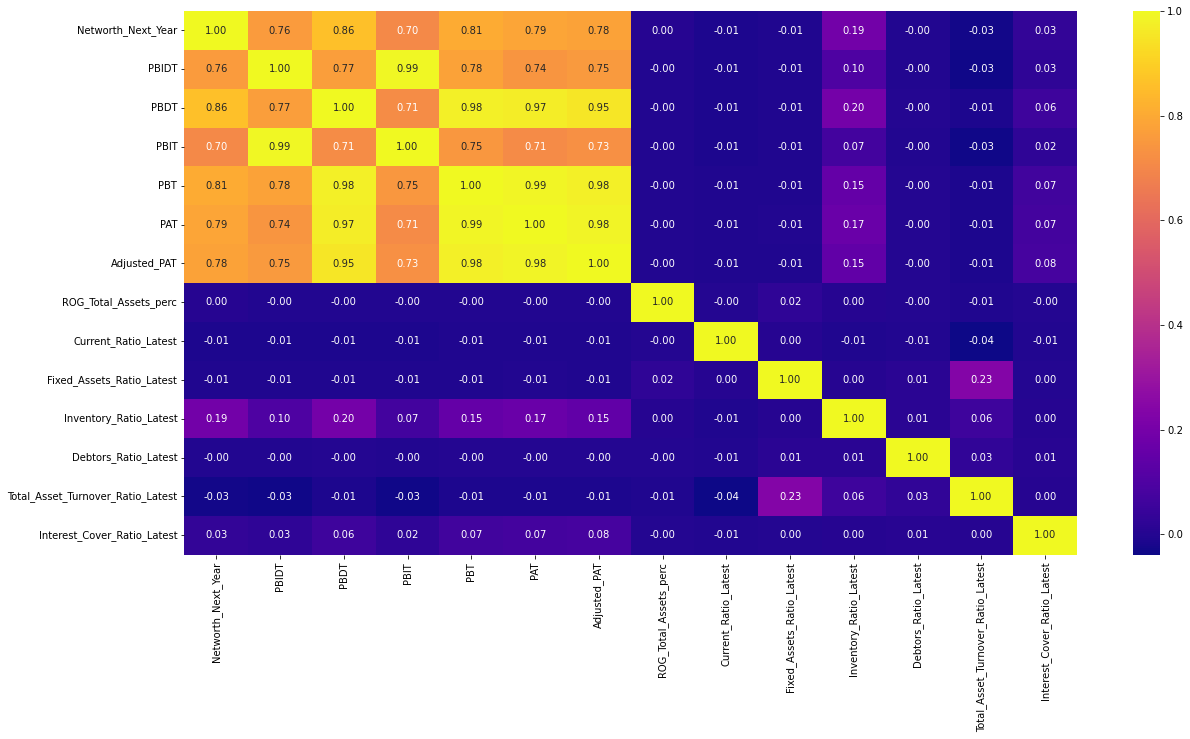

In [171]:
plt.subplots(figsize = (20,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'plasma', fmt = '.2f');

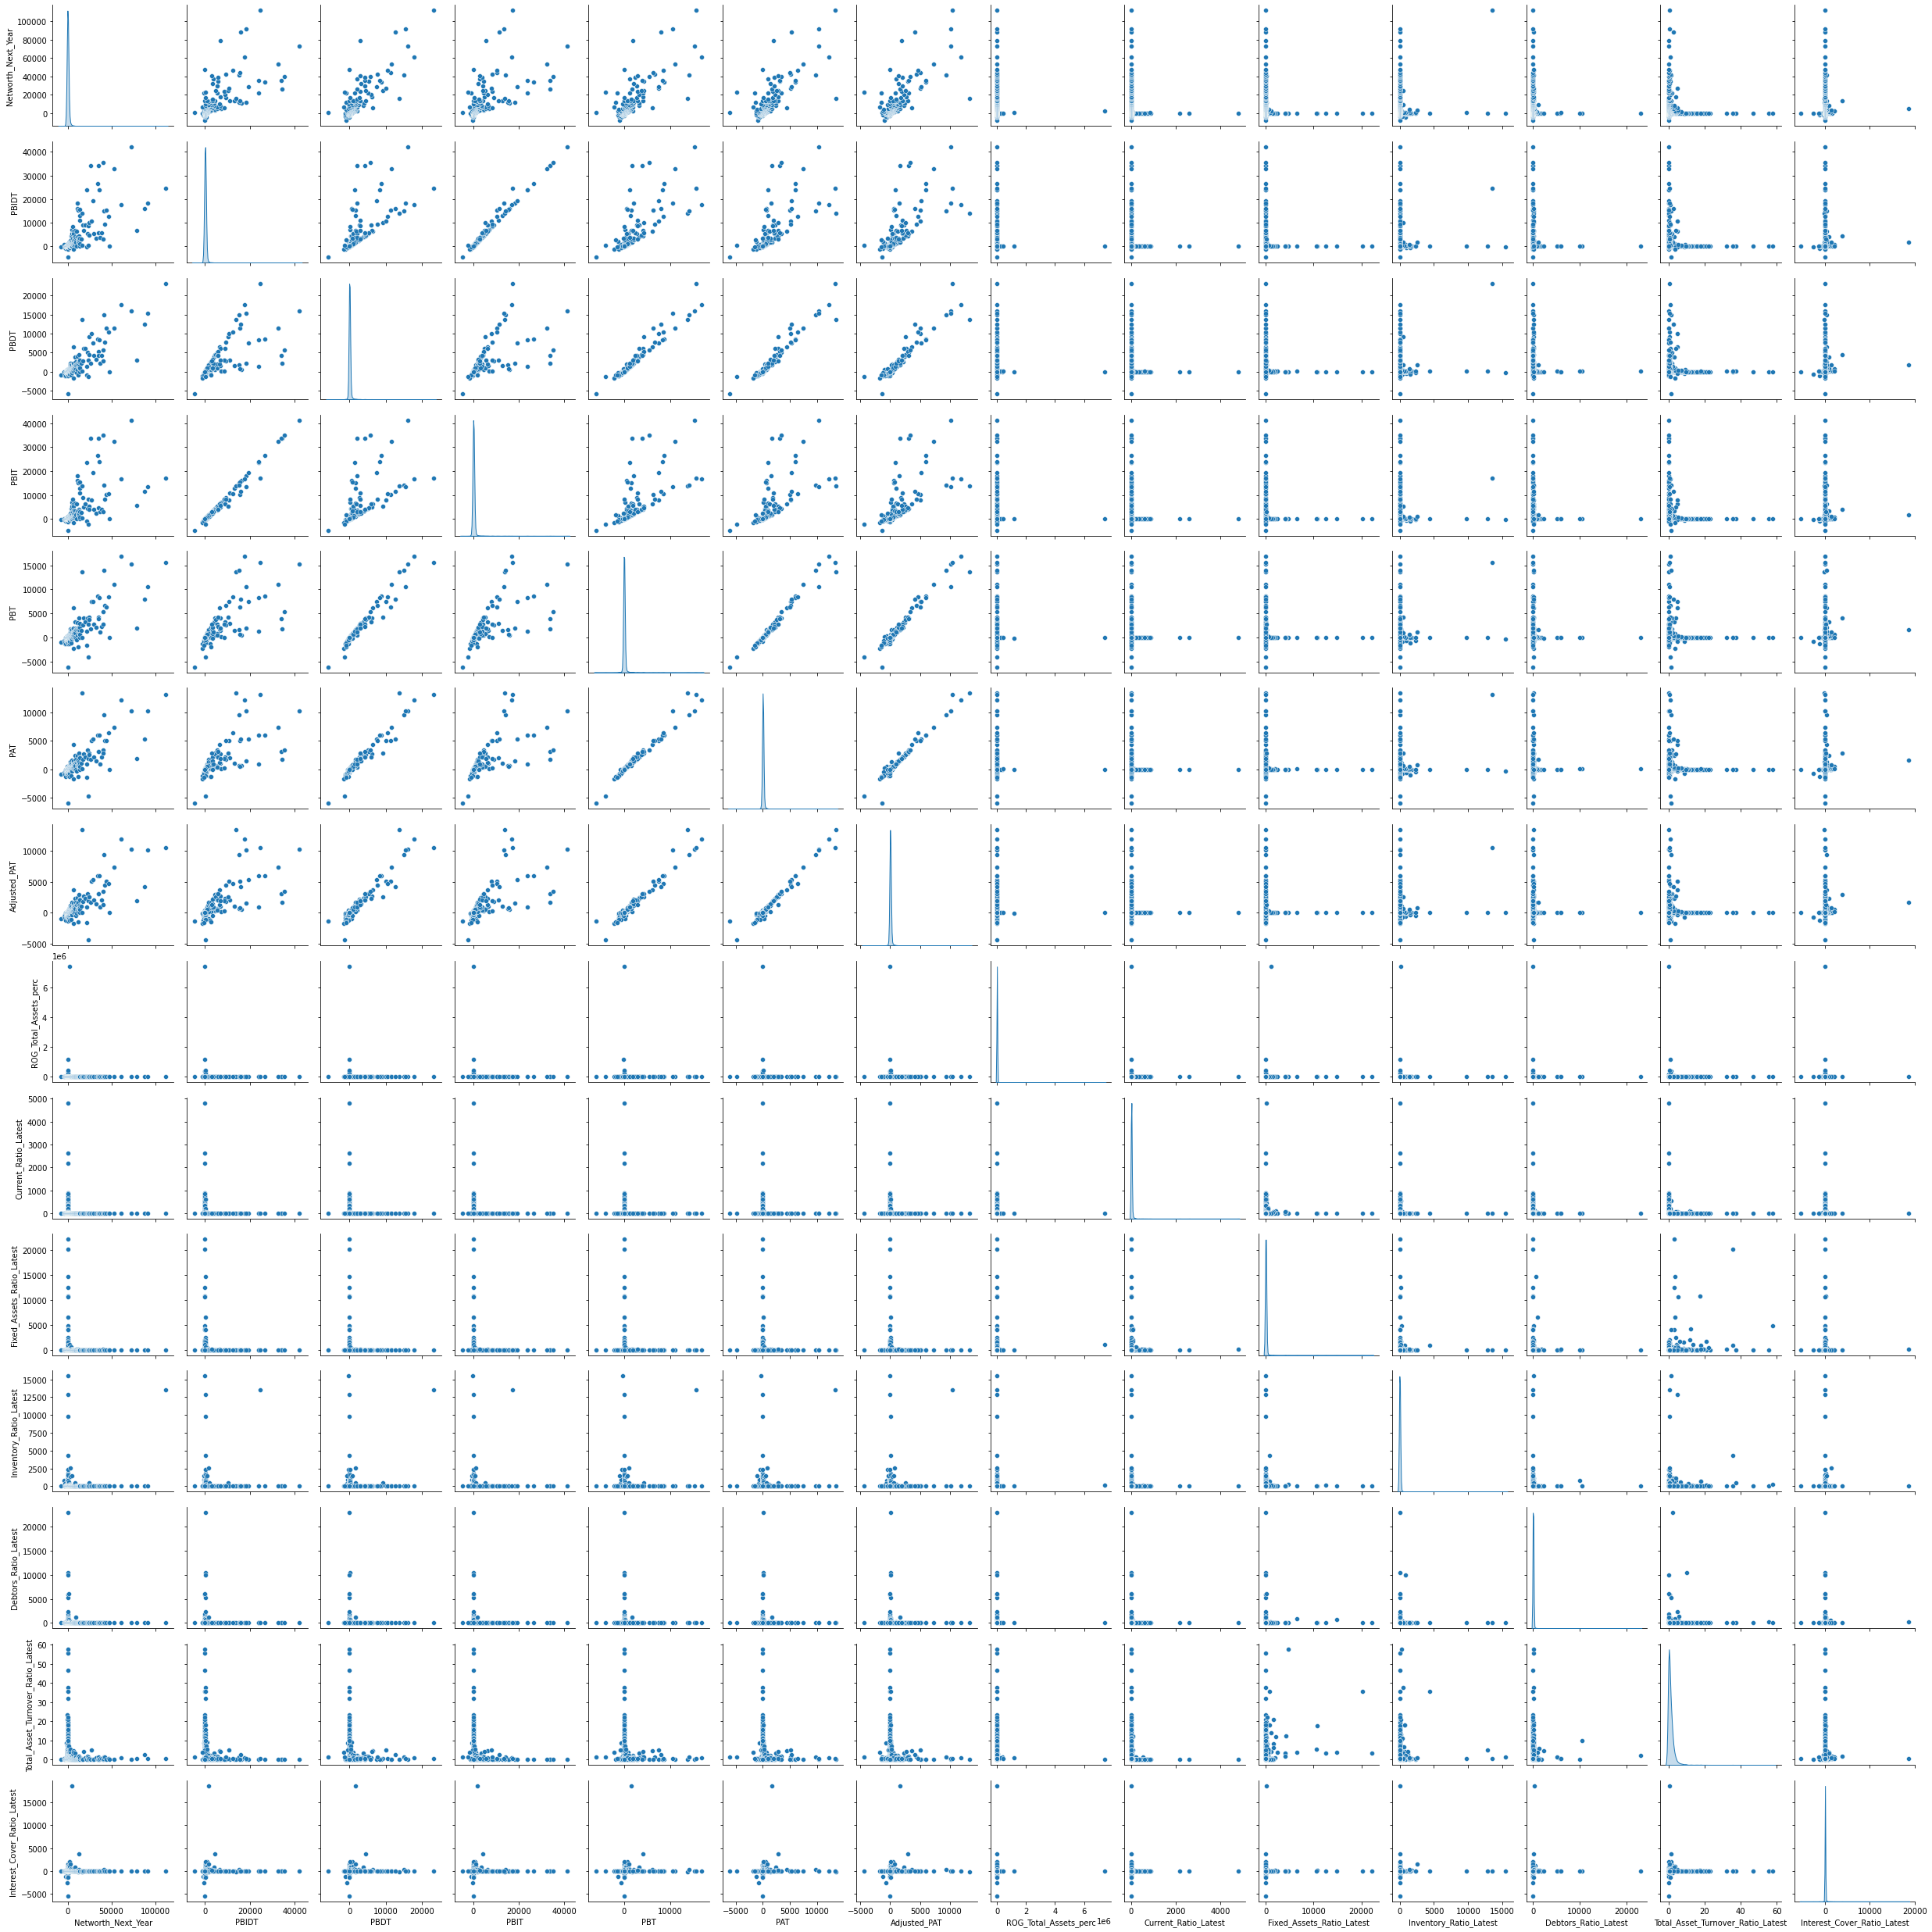

In [172]:
sns.pairplot(df1,diag_kind = 'kde')

In [173]:
df_temp = df[['Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest',
       'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
       'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
       'Value_of_Output_by_Total_Assets', 'Value_of_Output_by_Gross_Block']]

<AxesSubplot:>

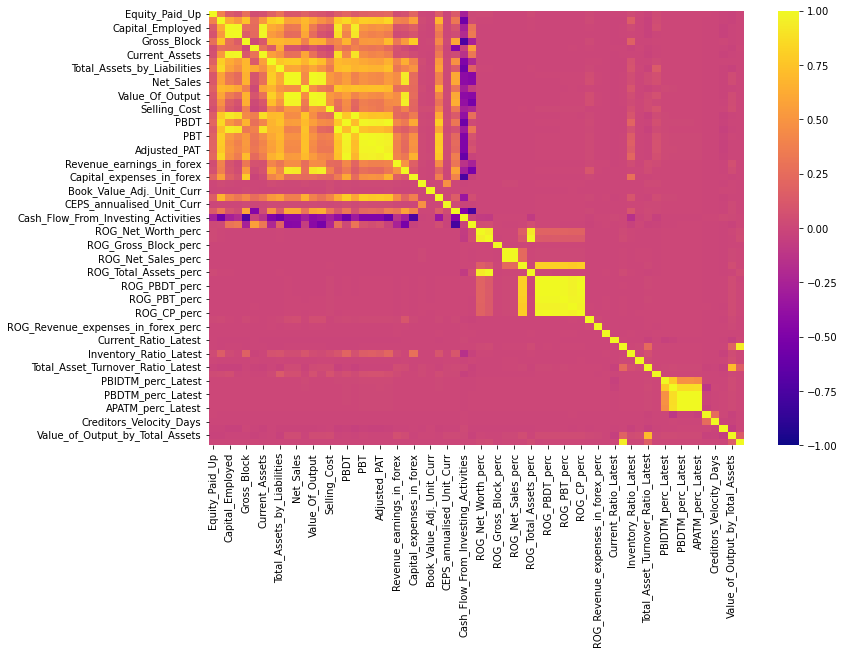

In [174]:
plt.figure(figsize = (12,8))
cor_matrix = df_temp.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [175]:
df_temp_1 = df[['Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities']]

<AxesSubplot:>

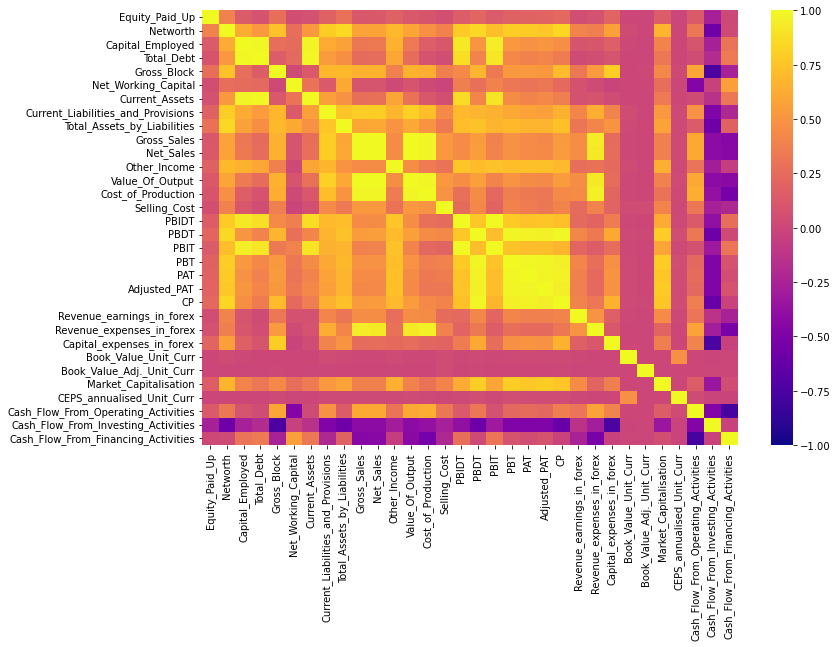

In [176]:
plt.figure(figsize = (12,8))
cor_matrix_1 = df_temp_1.corr()
sns.heatmap(cor_matrix_1, cmap = 'plasma', vmin = -1, vmax= 1)

In [177]:
df_temp_2 = df[['ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc']]

<AxesSubplot:>

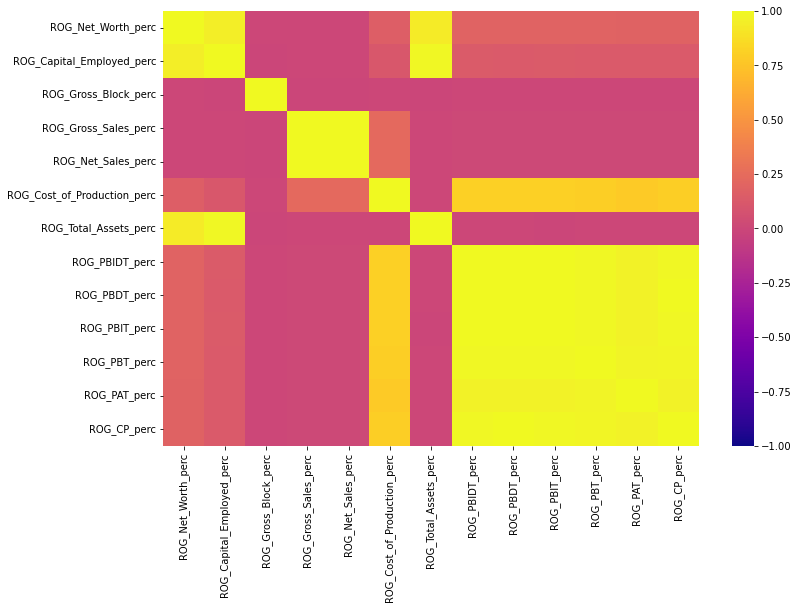

In [178]:
plt.figure(figsize = (12,8))
cor_matrix_2 = df_temp_2.corr()
sns.heatmap(cor_matrix_2, cmap = 'plasma',  vmin = -1, vmax= 1)

In [179]:
df_temp_3 = df[['Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest',
'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days',
'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
'Value_of_Output_by_Total_Assets', 'Value_of_Output_by_Gross_Block']]

<AxesSubplot:>

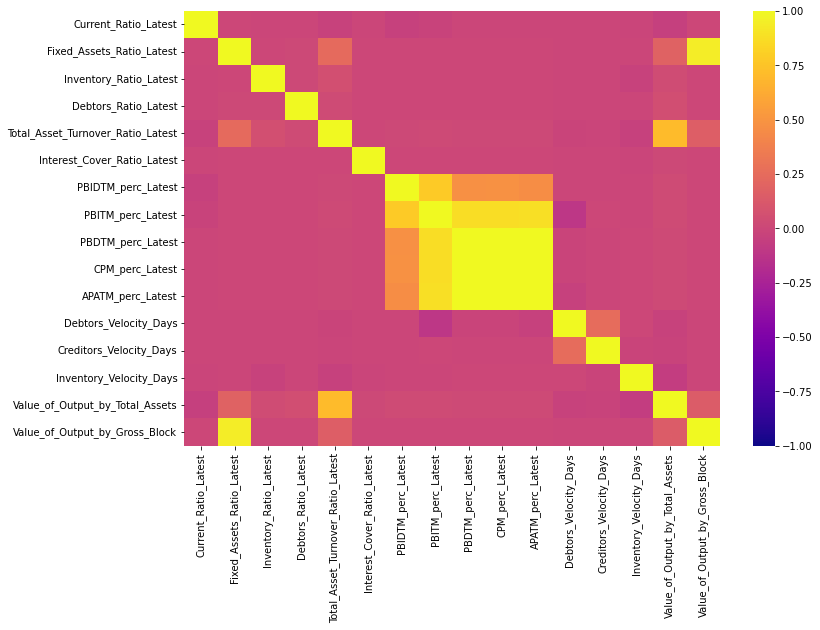

In [180]:
plt.figure(figsize = (12,8))
cor_matrix_3 = df_temp_3.corr()
sns.heatmap(cor_matrix_3, cmap = 'plasma',  vmin = -1, vmax= 1)

<AxesSubplot:>

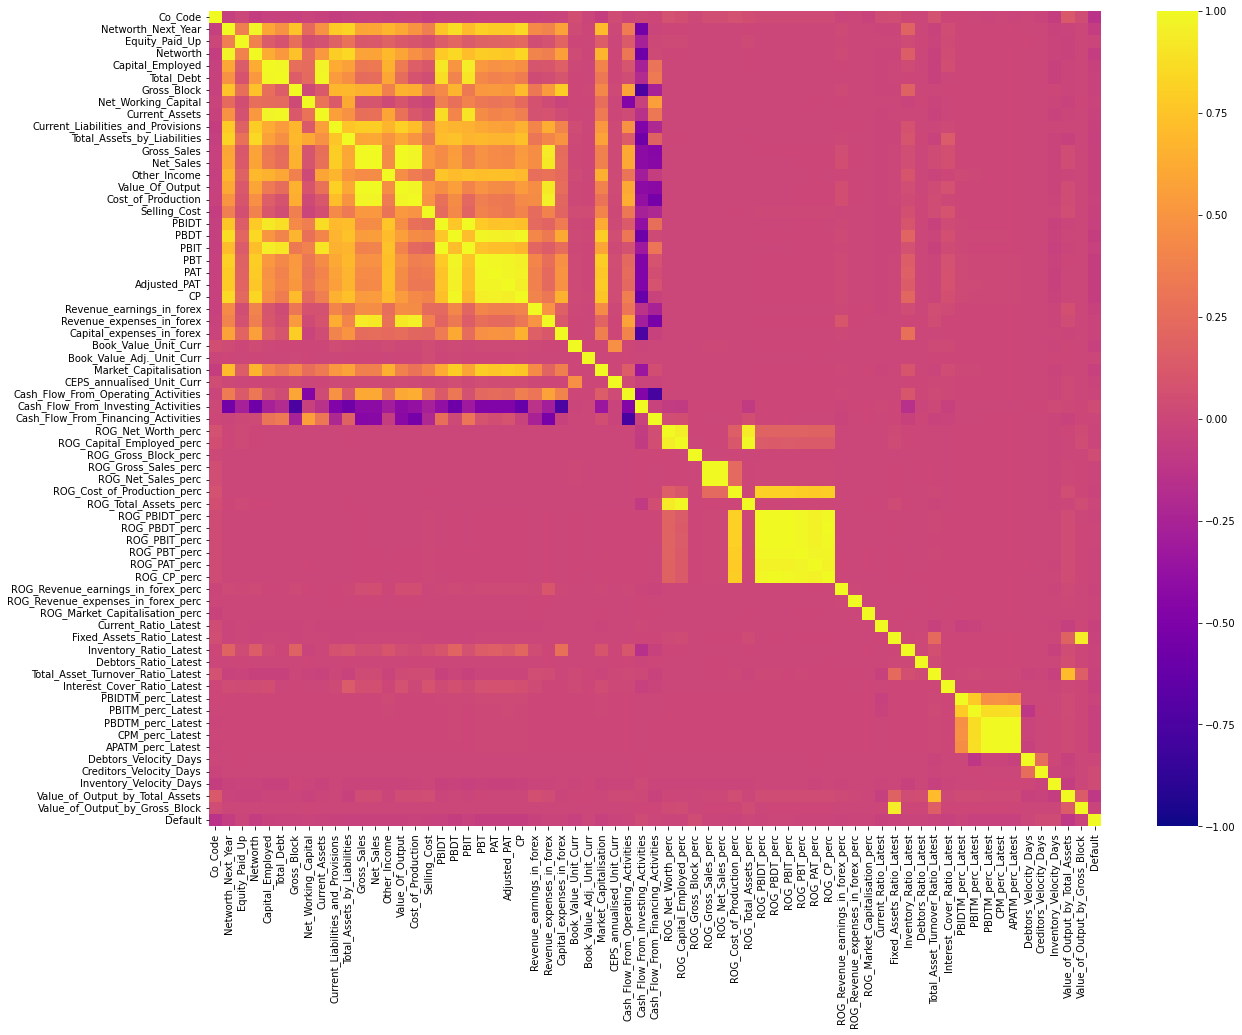

In [181]:
plt.figure(figsize = (20,15))
cor_matrix_4 = df.corr()
sns.heatmap(cor_matrix_4, cmap = 'plasma',  vmin = -1, vmax= 1)

### Missing values treatment with median

In [182]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64], dtype=int64),)


In [183]:
cols_missing=df.isnull().sum()[df.isnull().sum()>0].index
cols_missing

Index(['Book_Value_Adj._Unit_Curr', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest',
       'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest',
       'APATM_perc_Latest', 'Inventory_Velocity_Days'],
      dtype='object')

In [184]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df[cols_missing].iloc[:,:])

df[cols_missing]=imputer.transform(df[cols_missing])

In [185]:
df.isnull().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_by_Liabilities            0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

In [186]:
df[['Book_Value_Adj._Unit_Curr', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest',
       'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest',
       'APATM_perc_Latest', 'Inventory_Velocity_Days']].isnull().sum()

Book_Value_Adj._Unit_Curr            0
Current_Ratio_Latest                 0
Fixed_Assets_Ratio_Latest            0
Inventory_Ratio_Latest               0
Debtors_Ratio_Latest                 0
Total_Asset_Turnover_Ratio_Latest    0
Interest_Cover_Ratio_Latest          0
PBIDTM_perc_Latest                   0
PBITM_perc_Latest                    0
PBDTM_perc_Latest                    0
CPM_perc_Latest                      0
APATM_perc_Latest                    0
Inventory_Velocity_Days              0
dtype: int64

### Outlier Treatment

In [187]:
df_X = df.drop(['Default',"Co_Code","Co_Name","Networth_Next_Year"], axis = 1)
df_Y = df['Default']

In [188]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [189]:
((((df_X > UL) | (df_X < LL)).sum()/df_X.index.size).sort_values(ascending=False))

ROG_Revenue_expenses_in_forex_perc     0.450363
ROG_Revenue_earnings_in_forex_perc     0.367262
Cash_Flow_From_Financing_Activities    0.280257
PAT                                    0.267429
Adjusted_PAT                           0.266035
PBT                                    0.262409
APATM_perc_Latest                      0.260457
Cash_Flow_From_Investing_Activities    0.244283
ROG_Gross_Block_perc                   0.231456
CP                                     0.227552
PBDT                                   0.227273
Cash_Flow_From_Operating_Activities    0.223369
ROG_Net_Worth_perc                     0.208310
Revenue_earnings_in_forex              0.205800
Interest_Cover_Ratio_Latest            0.202175
PBIT                                   0.200781
CPM_perc_Latest                        0.200781
PBITM_perc_Latest                      0.200223
PBDTM_perc_Latest                      0.194088
Capital_expenses_in_forex              0.193530
Revenue_expenses_in_forex              0

In [190]:
((((df_X > UL) | (df_X < LL)).sum()/df_X.index.size).sort_values(ascending=False)).mean()

0.18028008226436135

### Maximum of 45% of the total rows are outliers for a particular variable in the dataset. And the mean numbers of outliers above and below the specified band is around 18%. We are snapping the those outliers to the upper band and lower band respectively.

In [191]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [192]:
for i in df_X:
    df_X[i]=treat_outlier(df_X[i])

0.5 3.75 19.5175 131.24 <built-in function min> <built-in function max>
-11.6975 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.4225 7.6025 226.605 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.6100000000001 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.945 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425 242.25 2845.3725 <built-in function min> <built-in function max>
0.0 1.44 234.44 2780.14 <built-in function min> <built-in function max>
0.0 0.02 3.6350000000000002 78.80250000000001 <built-in function min> <built-in function max>
0.0 1.41249999999999

<AxesSubplot:>

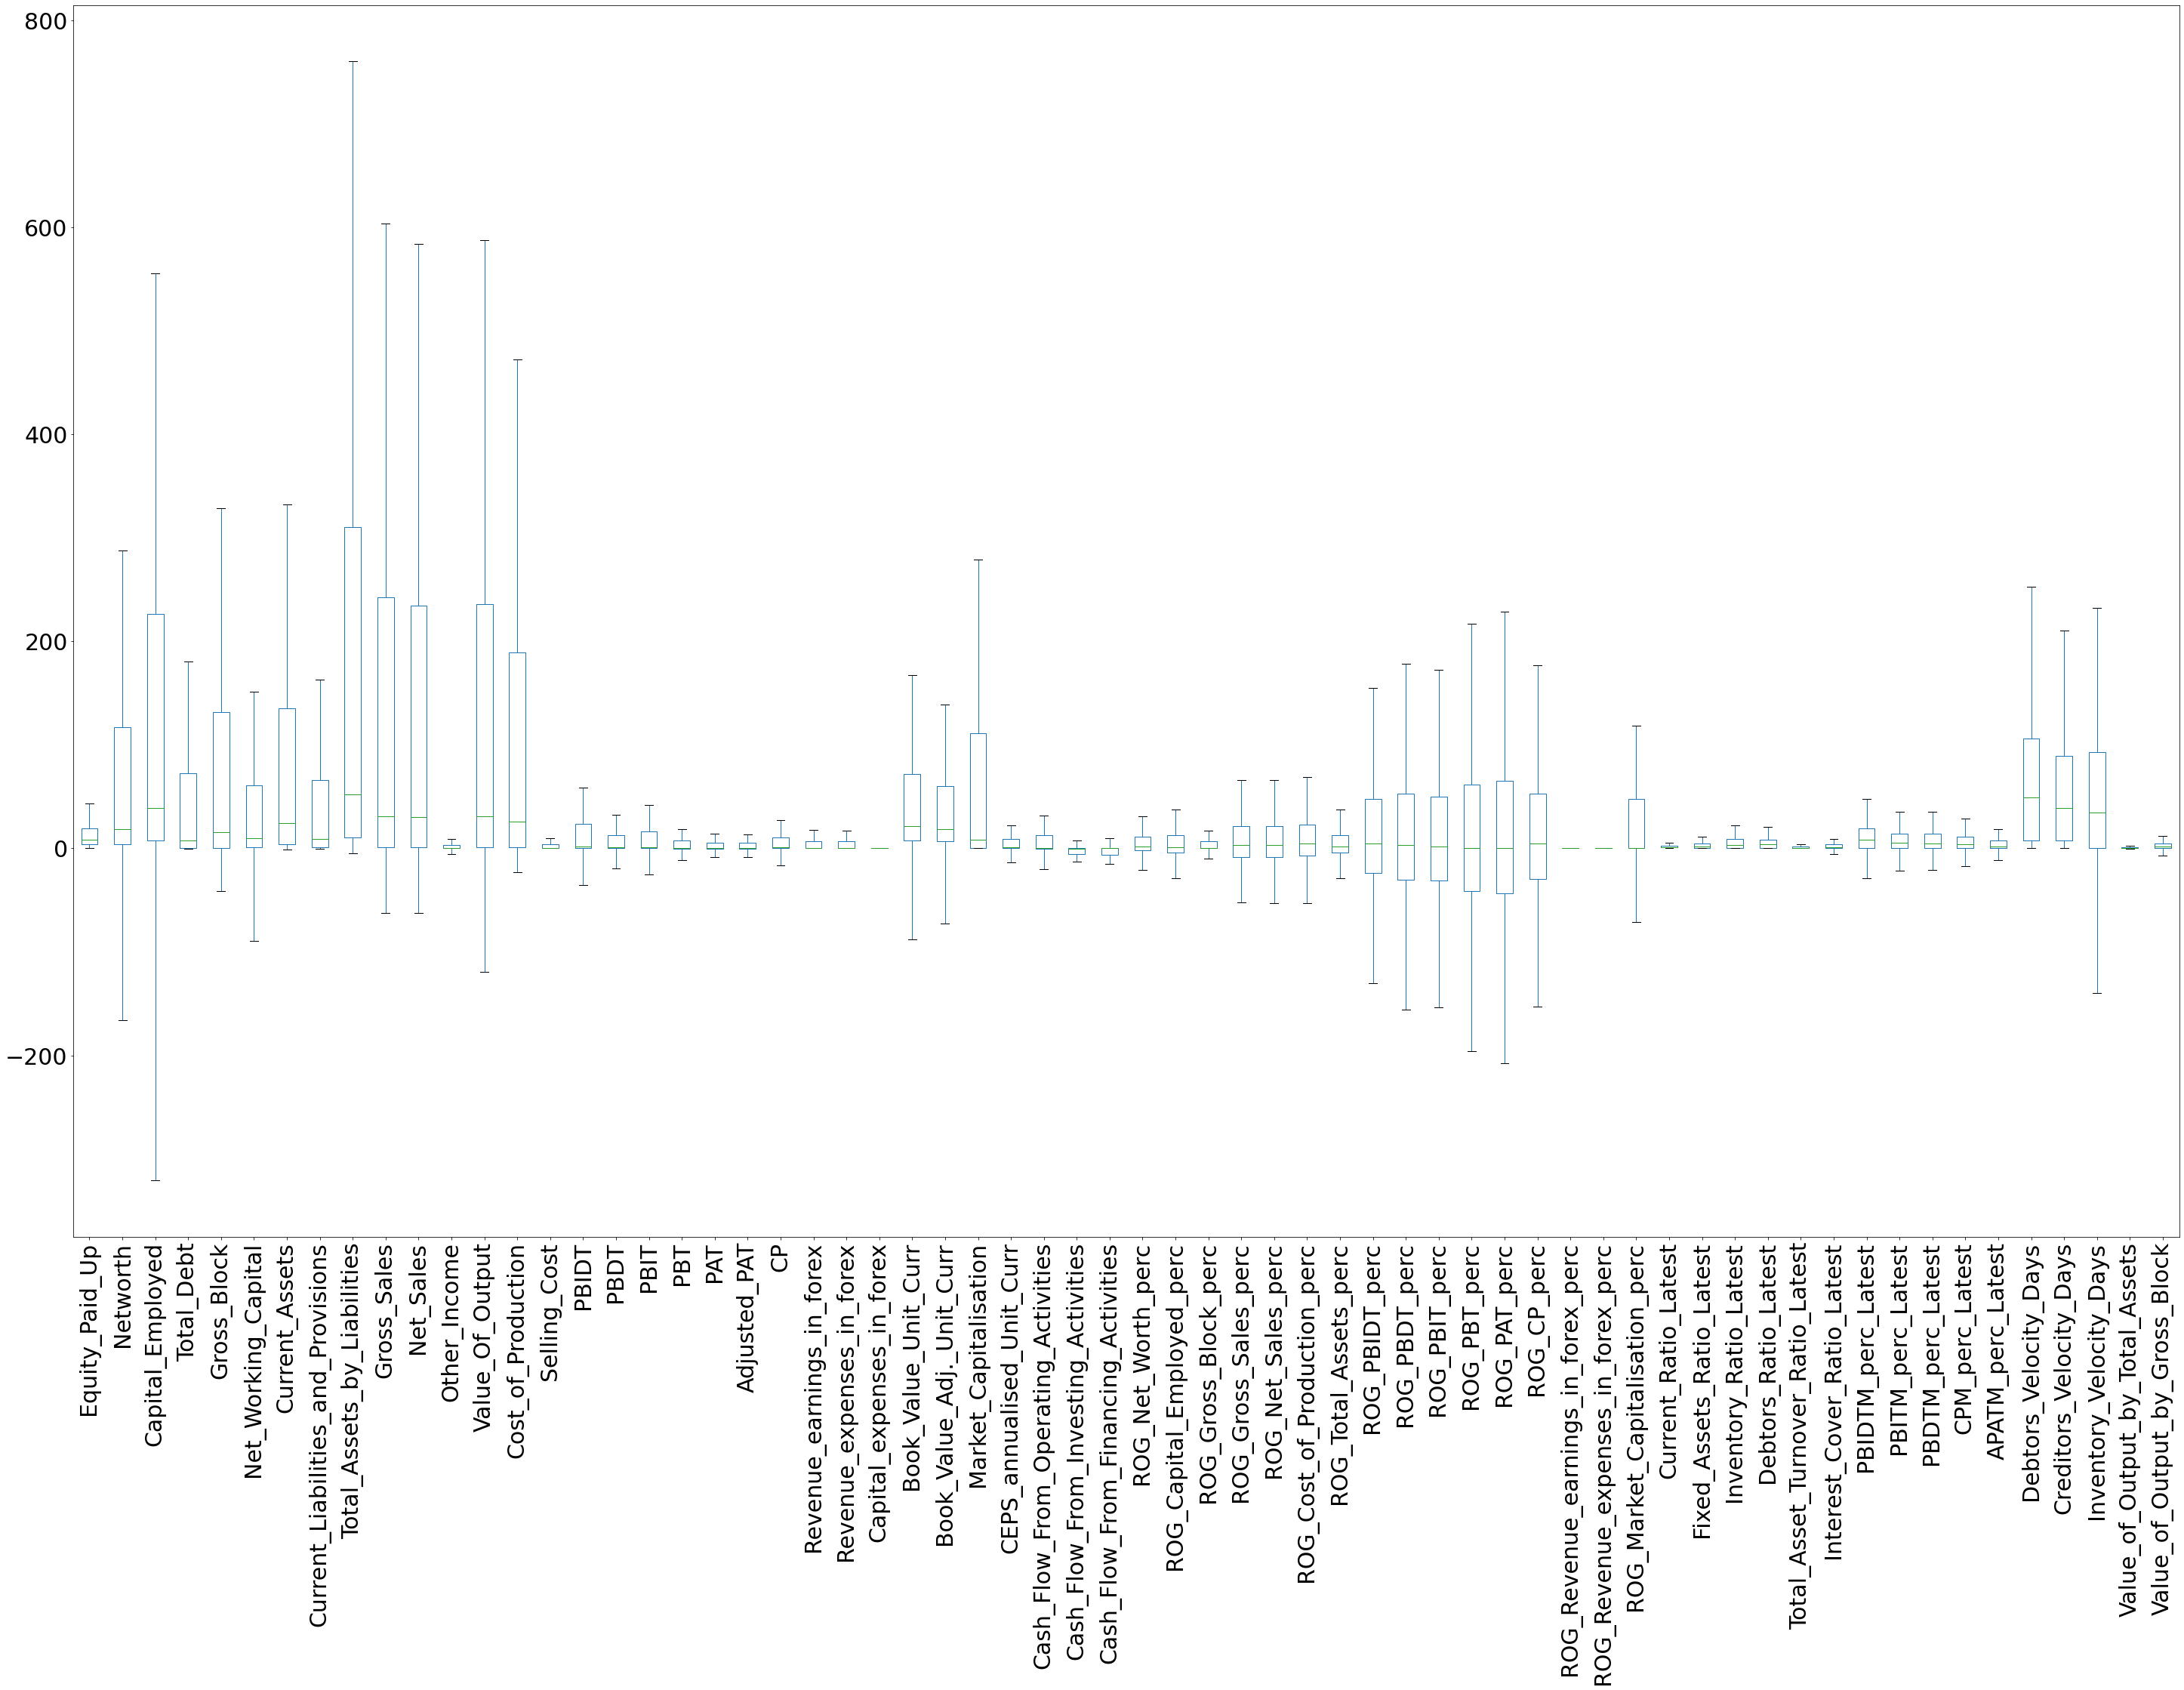

In [193]:
plt.figure(figsize=(50,30))
df_X.boxplot(grid=False, rot=90, fontsize=30)

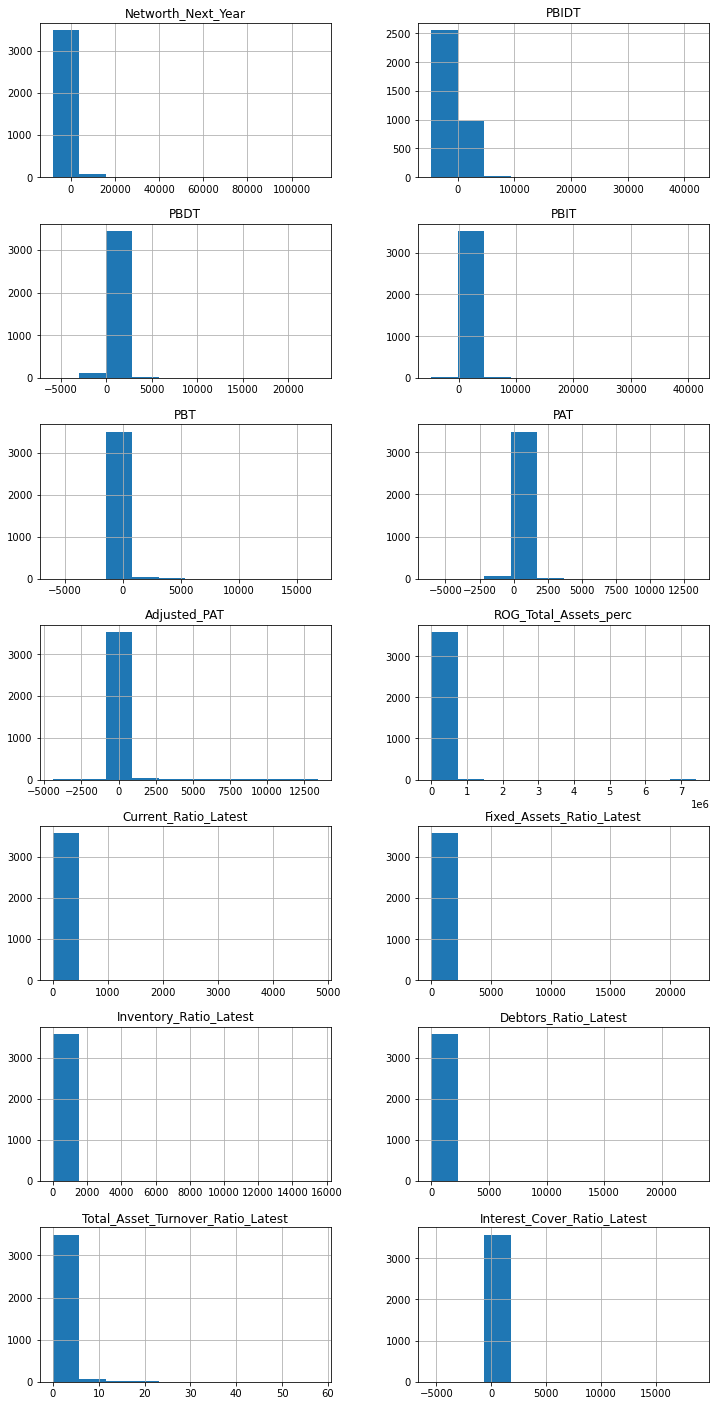

In [194]:
# Let's us only plot the distributions of independent attributes
df1.hist(figsize=(12,25),layout=(7,2));

#### All the outliers are treated...

### Model Building using Logistic Regression for 'Probability at default'

#### Now, Importing statsmodels modules

In [195]:
import statsmodels.formula.api as SM

### Creating train & test datasets

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.33,random_state=42,stratify=df['Default'])

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

#df_train.to_csv('df_train.csv',index=False)
#df_test.to_csv('df_test.csv',index=False)

In [197]:
df_train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc

In [198]:
print('The number of rows (observations) in TRAIN set is',df_train.shape[0],'\n''The number of columns (variables) in TRAIN set is',df_train.shape[1])

The number of rows (observations) in TRAIN set is 2402 
The number of columns (variables) in TRAIN set is 65


In [199]:
print('The number of rows (observations) in TEST set is',df_test.shape[0],'\n''The number of columns (variables) in TEST set is',df_test.shape[1])

The number of rows (observations) in TEST set is 1184 
The number of columns (variables) in TEST set is 65


### Feature Selection

#### The optimal machine learning problem approach is to perform extensive EDA on dataset and understand properties of the predictors before even getting into training models on these variables. However, this is not always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of variables, which can quickly outrun human comprehension.

#### Feature selection is the process of tuning down the number of predictor variables used by the models you build.

### Model 1

#### Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

#### First of all, variance inflation factor(VIF) is used as criteria to eliminate some of the variables.

In [200]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return(vif)

In [201]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

variables          VIF
34                 ROG_Gross_Block_perc     1.524386
47       ROG_Market_Capitalisation_perc     1.676561
61              Inventory_Velocity_Days     1.924207
37          ROG_Cost_of_Production_perc     2.029579
60              Creditors_Velocity_Days     2.305668
50               Inventory_Ratio_Latest     2.343545
48                 Current_Ratio_Latest     2.397185
59                Debtors_Velocity_Days     2.474369
51                 Debtors_Ratio_Latest     2.531709
53          Interest_Cover_Ratio_Latest     2.541902
30  Cash_Flow_From_Investing_Activities     2.606063
32                   ROG_Net_Worth_perc     2.965792
31  Cash_Flow_From_Financing_Activities     2.991789
22            Revenue_earnings_in_forex     3.092275
38                ROG_Total_Assets_perc     3.259153
23            Revenue_expenses_in_forex     3.719369
33            ROG_Capital_Employed_perc     3.842840
29  Cash_Flow_From_Operating_Activities     4.047336
0                        Equity_Paid_Up     4.568407
27                Market_Capitalisation     4.586333
11                         Other_Income     4.591128
14                         Selling_Cost     4.907195
5                   Net_Working_Capital     5.847854
28            CEPS_annualised_Unit_Curr     6.663665
3                            Total_Debt     7.596788
49            Fixed_Assets_Ratio_Latest     9.239632
63       Value_of_Output_by_Gross_Block     9.518160
52    Total_Asset_Turnover_Ratio_Latest    10.466825
62      Value_of_Output_by_Total_Assets    11.837468
4                           Gross_Block    12.498251
26            Book_Value_Adj._Unit_Curr    12.588579
1                              Networth    12.898845
43                         ROG_PAT_perc    13.630985
41                        ROG_PBIT_perc    14.097670
25                 Book_Value_Unit_Curr    16.348994
44                          ROG_CP_perc    16.866172
39                       ROG_PBIDT_perc    17.076875
20                         Adjusted_PAT    17.368941
42                         ROG_PBT_perc    17.986538
58                    APATM_perc_Latest    19.795721
40                        ROG_PBDT_perc    23.462276
7    Current_Liabilities_and_Provisions    25.456194
56                    PBDTM_perc_Latest    29.054765
55                    PBITM_perc_Latest    30.919216
57                      CPM_perc_Latest    32.685661
17                                 PBIT    33.326853
54                   PBIDTM_perc_Latest    33.908813
6                        Current_Assets    34.804508
15                                PBIDT    40.250350
13                   Cost_of_Production    49.236214
2                      Capital_Employed    70.510704
19                                  PAT    79.517043
18                                  PBT    83.010367
8           Total_Assets_by_Liabilities   102.417724
21                                   CP   129.681878
16                                 PBDT   136.859867
36                   ROG_Net_Sales_perc   528.691292
35                 ROG_Gross_Sales_perc   529.543274
12                      Value_Of_Output   652.419803
9                           Gross_Sales   763.156319
10                            Net_Sales  1419.303792
24            Capital_expenses_in_forex          NaN
45   ROG_Revenue_earnings_in_forex_perc          NaN
46   ROG_Revenue_expenses_in_forex_perc          NaN

### Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model.

### Considering only the variabes with VIF less than equal to 5.

In [202]:
f_1 = 'Default ~ ROG_Gross_Block_perc+ROG_Market_Capitalisation_perc+Inventory_Velocity_Days+ROG_Cost_of_Production_perc+Creditors_Velocity_Days+Inventory_Ratio_Latest+Current_Ratio_Latest+Debtors_Velocity_Days+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+Cash_Flow_From_Financing_Activities+Revenue_earnings_in_forex+ROG_Total_Assets_perc+Revenue_expenses_in_forex+ROG_Capital_Employed_perc+Cash_Flow_From_Operating_Activities+Equity_Paid_Up+Market_Capitalisation+Other_Income+Selling_Cost'

### Fitting the logistic regression model

In [203]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.206099
         Iterations 8


#### Studying whether this equation is significant or not

In [204]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                  0.3988
Time:                        14:15:41   Log-Likelihood:                -495.05
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                9.720e-125
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6458      0.184     -3.518      0.000      -1.005      -0.286
ROG_Gross_Block_perc                   -0.0324      0.014     -2.264      0.024      -0.060      -0.004
ROG_Market_Capitalisation_perc         -0.0004      0.002     -0.178      0.859      -0.004       0.004
Inventory_Velocity_Days                -0.0013      0.001     -1.087      0.277      -0.004       0.001
ROG_Cost_of_Production_perc            -0.0093      0.003     -3.561      0.000      -0.014      -0.004
Creditors_Velocity_Days                 0.0040      0.001      3.495      0.000       0.002       0.006
Inventory_Ratio_Latest                 -0.0119      0.014     -0.869      0.385      -0.039       0.015
Current_Ratio_Latest                   -0.7525      0.085     -8.871      0.000      -0.919      -0.586
Debtors_Velocity_Days                  -0.0040      0.001     -3.796      0.000      -0.006      -0.002
Debtors_Ratio_Latest                   -0.0200      0.015     -1.343      0.179      -0.049       0.009
Interest_Cover_Ratio_Latest            -0.1628      0.031     -5.192      0.000      -0.224      -0.101
Cash_Flow_From_Investing_Activities     0.0144      0.025      0.573      0.567      -0.035       0.064
ROG_Net_Worth_perc                     -0.0502      0.008     -5.911      0.000      -0.067      -0.034
Cash_Flow_From_Financing_Activities     0.0116      0.023      0.503      0.615      -0.034       0.057
Revenue_earnings_in_forex              -0.0266      0.019     -1.369      0.171      -0.065       0.011
ROG_Total_Assets_perc                  -0.0117      0.008     -1.489      0.136      -0.027       0.004
Revenue_expenses_in_forex               0.0365      0.020      1.804      0.071      -0.003       0.076
ROG_Capital_Employed_perc              -0.0013      0.008     -0.157      0.876      -0.017       0.014
Cash_Flow_From_Operating_Activities    -0.0059      0.013     -0.457      0.648      -0.031       0.019
Equity_Paid_Up                          0.0176      0.007      2.354      0.019       0.003       0.032
Market_Capitalisation                  -0.0091      0.002     -4.936      0.000      -0.013      -0.005
Other_Income                            0.0198      0.037      0.534      0.593      -0.053       0.093
Selling_Cost                           -0.0279      0.044     -0.634      0.526      -0.114       0.058
=======================================================================================================
"""

### We can see that few variables are insignificant & may not be useful to discriminate cases of default. We will try & remove variables whose p value is greater than 0.05 & rebuild our model.

In [205]:
f_2 = 'Default ~ ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+Creditors_Velocity_Days+Current_Ratio_Latest+Debtors_Velocity_Days+Interest_Cover_Ratio_Latest+ROG_Net_Worth_perc+Revenue_expenses_in_forex+Equity_Paid_Up+Market_Capitalisation'

### Model 2

### Fitting the logistic regression model

In [206]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.210232
         Iterations 8


In [207]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                  0.3868
Time:                        14:15:41   Log-Likelihood:                -504.98
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.082e-130
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.8746      0.167     -5.236      0.000      -1.202      -0.547
ROG_Gross_Block_perc           -0.0442      0.013     -3.282      0.001      -0.071      -0.018
ROG_Cost_of_Production_perc    -0.0097      0.003     -3.796      0.000      -0.015      -0.005
Creditors_Velocity_Days         0.0043      0.001      3.751      0.000       0.002       0.006
Current_Ratio_Latest           -0.7667      0.088     -8.692      0.000      -0.940      -0.594
Debtors_Velocity_Days          -0.0040      0.001     -3.959      0.000      -0.006      -0.002
Interest_Cover_Ratio_Latest    -0.1707      0.031     -5.546      0.000      -0.231      -0.110
ROG_Net_Worth_perc             -0.0559      0.007     -7.982      0.000      -0.070      -0.042
Revenue_expenses_in_forex       0.0014      0.016      0.088      0.930      -0.030       0.032
Equity_Paid_Up                  0.0171      0.007      2.428      0.015       0.003       0.031
Market_Capitalisation          -0.0101      0.002     -6.004      0.000      -0.013      -0.007
===============================================================================================
"""

### P-value of Revenue_expenses_in_forex is the highest and is insignificant. Hence the variable can be dropped

### Model 3

In [208]:
f_3 = 'Default ~ ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+Creditors_Velocity_Days+Current_Ratio_Latest+Debtors_Velocity_Days+Interest_Cover_Ratio_Latest+ROG_Net_Worth_perc+Market_Capitalisation'

In [209]:
model_3 = SM.logit(formula = f_3, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.211511
         Iterations 8


In [210]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                  0.3830
Time:                        14:15:41   Log-Likelihood:                -508.05
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.464e-131
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7265      0.155     -4.690      0.000      -1.030      -0.423
ROG_Gross_Block_perc           -0.0445      0.013     -3.322      0.001      -0.071      -0.018
ROG_Cost_of_Production_perc    -0.0101      0.003     -3.967      0.000      -0.015      -0.005
Creditors_Velocity_Days         0.0043      0.001      3.852      0.000       0.002       0.007
Current_Ratio_Latest           -0.7759      0.088     -8.789      0.000      -0.949      -0.603
Debtors_Velocity_Days          -0.0037      0.001     -3.774      0.000      -0.006      -0.002
Interest_Cover_Ratio_Latest    -0.1740      0.031     -5.702      0.000      -0.234      -0.114
ROG_Net_Worth_perc             -0.0580      0.007     -8.316      0.000      -0.072      -0.044
Market_Capitalisation          -0.0083      0.001     -5.871      0.000      -0.011      -0.006
===============================================================================================
"""

In [211]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.37332315717920717


### Let us also check the multicollinearity of the model using Variance Inflation Factor (VIF) for the predictor variables

In [212]:
df1= df_train[['ROG_Gross_Block_perc','ROG_Cost_of_Production_perc','Creditors_Velocity_Days','Current_Ratio_Latest','Debtors_Velocity_Days','Interest_Cover_Ratio_Latest','ROG_Net_Worth_perc','Equity_Paid_Up','Market_Capitalisation']]

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif_1(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables_1"] = df1.columns
    vif["VIF_new"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

In [214]:
calc_vif_1(df1).sort_values(by='VIF_new', ascending = True)

variables_1   VIF_new
1  ROG_Cost_of_Production_perc  1.135404
0         ROG_Gross_Block_perc  1.292666
6           ROG_Net_Worth_perc  1.370568
5  Interest_Cover_Ratio_Latest  1.553236
3         Current_Ratio_Latest  1.612578
2      Creditors_Velocity_Days  2.007755
4        Debtors_Velocity_Days  2.082292
8        Market_Capitalisation  2.440010
7               Equity_Paid_Up  2.683910

### We can see that multicollinearity still exists but we will keep those variables as VIFs are not very high (<5).

## Prediction on the Data

### Checking the predicted probability values.

In [215]:
y_prob_pred_train = model_3.predict(df_train)
y_prob_pred_train

842     0.005688
1057    0.000729
1595    0.000453
100     0.448392
1191    0.033383
          ...   
1815    0.003182
2852    0.151420
1505    0.001055
375     0.516472
3428    0.000920
Length: 2402, dtype: float64

#### Checking predicted classes with 0.5 probability cut-off

In [216]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

## Model Evaluation on the Training Data

#### Let us now check the confusion matrix and the classification report followed by the AUC and the AUC-ROC curve.

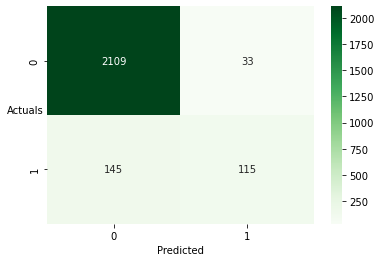

In [217]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [218]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.936     0.985     0.960      2142
           1      0.777     0.442     0.564       260

    accuracy                          0.926      2402
   macro avg      0.856     0.713     0.762      2402
weighted avg      0.918     0.926     0.917      2402



#### Overall 93% of correct predictions to total predictions were made by the model.
### 44% of those defaulted were correctly identified as defaulters by the model, which is not so good number.
### We will change the probability cut-offs and check if our predictions have improved.

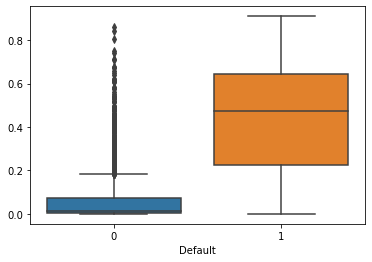

In [219]:
sns.boxplot(x=df_train['Default'],y=y_prob_pred_train)
plt.xlabel('Default');

### From the above boxplot, we can decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.07 and check.

## Let us take a cut-off of 0.07 and check our predictions

In [220]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

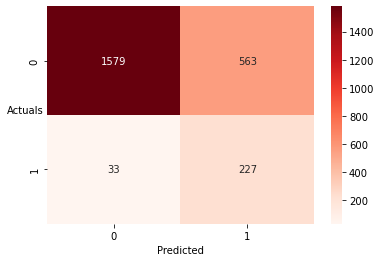

In [221]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [222]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.737     0.841      2142
           1      0.287     0.873     0.432       260

    accuracy                          0.752      2402
   macro avg      0.633     0.805     0.637      2402
weighted avg      0.905     0.752     0.797      2402



### Accuracy of the model i.e. %overall correct predictions has decreased from 93% to 75% but sensitivity of the model has increased from 44% to 87%, which is good for our prediction. But we will try with some more probability cut-off values.

### Let us take a cut-off of 0.08 and check our predictions

In [223]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

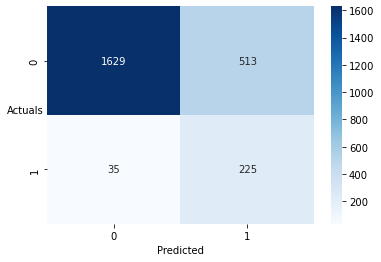

In [224]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [225]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.761     0.856      2142
           1      0.305     0.865     0.451       260

    accuracy                          0.772      2402
   macro avg      0.642     0.813     0.653      2402
weighted avg      0.906     0.772     0.812      2402



### Accuracy of the model i.e. %overall correct predictions has increased from 75% to 77% but sensitivity of the model remains same, which is good for our prediction. But we will try with some more probability cut-off values.

## Let us take a cut-off of 0.09 and check our predictions

In [226]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

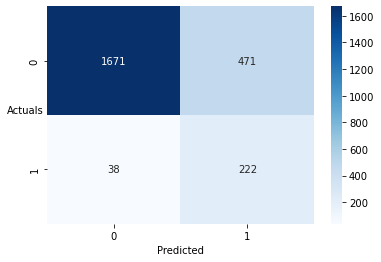

In [227]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [228]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.978     0.780     0.868      2142
           1      0.320     0.854     0.466       260

    accuracy                          0.788      2402
   macro avg      0.649     0.817     0.667      2402
weighted avg      0.907     0.788     0.824      2402



### Accuracy of the model i.e. %overall correct predictions has increased from 77% to 79% but sensitivity of the model remains reduced to 85%. But we will try with some more probability cut-off values.

### Let us take a cut-off of 0.10 and check our predictions

In [229]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.1:
        a=1
    else:
        a=0
    y_class_pred.append(a)

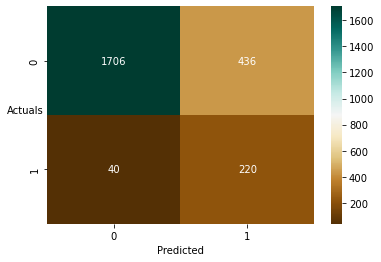

In [230]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [231]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.977     0.796     0.878      2142
           1      0.335     0.846     0.480       260

    accuracy                          0.802      2402
   macro avg      0.656     0.821     0.679      2402
weighted avg      0.908     0.802     0.835      2402



### Accuracy of the model i.e. %overall correct predictions has increased from 79% to 80% but sensitivity of the model remains same 85%. But we will try with some more probability cut-off values.

## Let us take a cut-off of 0.115 and check our predictions

In [241]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.115:
        a=1
    else:
        a=0
    y_class_pred.append(a)

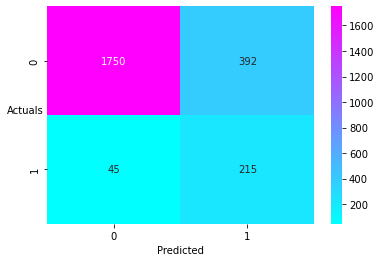

In [242]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='cool');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [243]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.975     0.817     0.889      2142
           1      0.354     0.827     0.496       260

    accuracy                          0.818      2402
   macro avg      0.665     0.822     0.692      2402
weighted avg      0.908     0.818     0.846      2402



## AUC and ROC for Training data

Area under Curve (AUC) is: 0.901


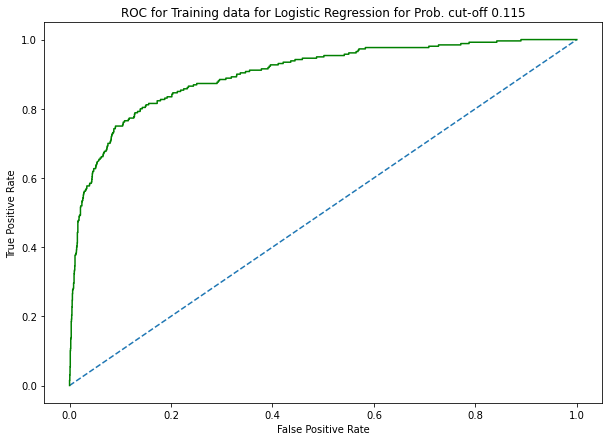

In [244]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
#probs_LOG = bestmodel_LOG.predict_proba(X_train)
#probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_train_auc = roc_auc_score(df_train['Default'], y_prob_pred_train)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
# calculate roc curve
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(df_train['Default'], y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='green')
plt.title('ROC for Training data for Logistic Regression for Prob. cut-off 0.115')
plt.show()

### Accuracy of the model i.e. %overall correct predictions has increased from 80% to 82% but sensitivity of the model has decreased slightly from 85% to 83%.
### We will keep this model for further analysis as we are trying to maintain a balance between Accuracy and Recall..

## Model Evaluation on the Test Data

In [245]:
y_prob_pred_test = model_3.predict(df_test)
y_prob_pred_test

251     0.339213
3493    0.008261
3063    0.010299
2384    0.068674
1679    0.000523
          ...   
1321    0.048216
2666    0.003726
773     0.002484
3488    0.001126
2956    0.061450
Length: 1184, dtype: float64

In [246]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.115:
        a=1
    else:
        a=0
    y_class_pred.append(a)

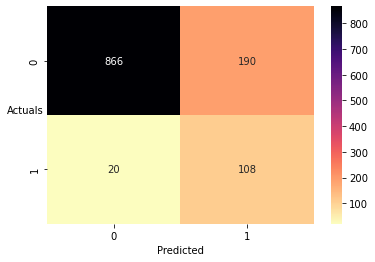

In [247]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='magma_r');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [248]:
print(metrics.classification_report(df_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.977     0.820     0.892      1056
           1      0.362     0.844     0.507       128

    accuracy                          0.823      1184
   macro avg      0.670     0.832     0.699      1184
weighted avg      0.911     0.823     0.850      1184



Area under Curve (AUC) is: 0.891


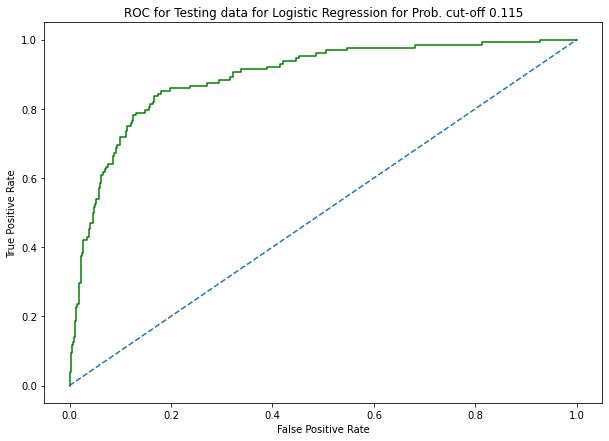

In [249]:
#from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
#probs_LOG = bestmodel_LOG.predict_proba(X_train)
#probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_test_auc = roc_auc_score(df_test['Default'], y_prob_pred_test)
print('Area under Curve (AUC) is: %.3f' % LOG_test_auc)
# calculate roc curve
LOG_test_fpr, LOG_test_tpr, LOG_test_thresholds = roc_curve(df_test['Default'], y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_test_fpr, LOG_test_tpr,color='green')
plt.title('ROC for Testing data for Logistic Regression for Prob. cut-off 0.115')
plt.show()

## Accuracy of the model i.e. %overall correct prediction is 82% and sensitivity of the model is 84%.

## So, model performs well with both train and test set.